<a href="https://colab.research.google.com/github/dishachopra/SRIP2023/blob/main/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I've used the numpy library to implement this.Took a toy data with 5 outcomes possible and P represents the true probability distribution and Q represtns the predicted probability distribution.

In [1]:
import numpy as np

x=np.array([0,1,2,3,4])
P = np.array([0.2, 0.3, 0.1, 0.15, 0.25])
Q = np.array([0.15, 0.25, 0.2, 0.2, 0.2])

To understand entropy take this ex:
A place where weather is random 50% prob of sunny and rainy each. Here if wwe transmit 1 bit of useful information it is sufficient, say 1 represents sunny and 0 rainy. 16 states with equal prob has 4 bits of useful info. Here 16 is the reduction factor and log2(16)=4 gives no. of bits required.

But if probs are not equal say 75%rainy 25%sunny. No. of useful bits of info is log(1/x) x=0.75 and 0.25 respectively. Total no. of bits of useful info is 
.75log(1/0.75) + .25log(1/.25)= .41-useful bits of info which is entropy. 

It gives the average amount of information that we get from one sample drawn from a given probability distribution p. It tells us how unpredictable the probability distribution is i.e suprise fof that distribution

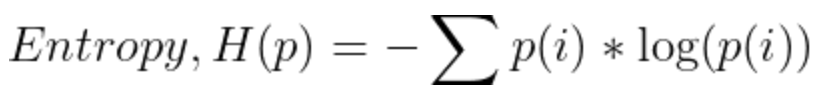

In [2]:
def entropy(p):
    return -np.sum(p * np.log(p))

entr = entropy(P)
print(entr)


1.5444795210968603


Cross entropy is the length of average message length. for 16 states ex, 4 is the cross entropy. But what if we have unequal prob for each of the state and represent each state with not only 4 bits, some with with 5, 3etc (the predicted probability distribution changes). Now to calculate cross entropy use summation Pi log (Qi). We see in the new distribution 1.6 bits of useful info is carries compared to 1.5 bits of true distribution. So differnce is the KL Divergence.
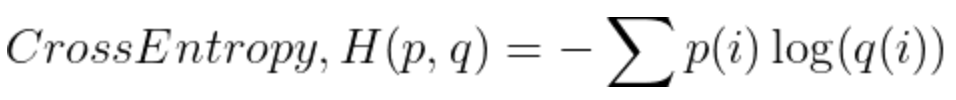

In [3]:
def CrossEntropy(p,q):
    return -np.sum(p * np.log(q))

CrossEntr = CrossEntropy(P,Q)
print(CrossEntr)

1.6000312615301937


If our predictions are perfect, that is the predicted distribution is equal to the true distribution, then the cross-entropy is simply equal to entropy.But if they are not the cross entropy will be greater than some no. of bits. This amount is called KL Divergence(cross entopy- entropy). Basically it shows the distance between 2 distributions.

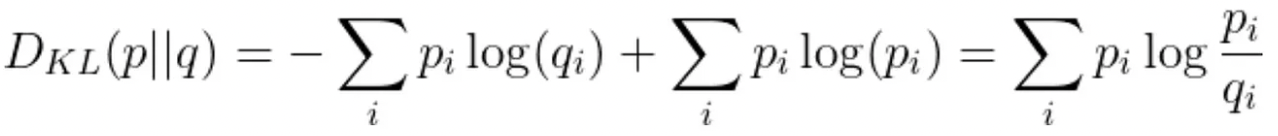

In [11]:
def KLDivergence1(p,q):
    return np.sum(p * np.log2(p / q))
kl_div= KLDivergence1(P,Q)
print(kl_div)

0.08014422043592093


KL divergence is a measure of dissimilarity between two probability distributions. It measures the amount of information lost when approximating one distribution with another. Its not symmetric as differences in general are not symmetric. Also it can be easily seen from formula. The example below depicts it

In [10]:
def KLDivergence2(q,p):
    return np.sum(q * np.log2(q / p))
kl_div= KLDivergence2(Q,P)
print(kl_div)

0.09060765452802132


Conditional entropy is a measure of uncertainty in a random variable Y given knowledge of another random variable X.It is the average number of bits needed to represent events from Y given knowledge of the value of X.

In [6]:
def conditional_entropy1(P, Q):
    return  -np.sum(P * np.log2(Q))
ce1 = conditional_entropy1(P, Q)
print(ce1)

2.308357166276922


This can be easily seen that it is not same for p given Q and Q given P

In [7]:
def conditional_entropy2(Q, P):
    return  -np.sum(Q * np.log2(P))
ce2 = conditional_entropy2(Q, P)
print(ce2)

2.39430935058537


Mutual Information (MI) is a measure of the amount of information shared between two random variables. It is a way to measure how much knowing one variable reduces uncertainty about the other. It measures the degree of dependency between two random variables.

I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) = H(X) + H(Y) - H(X,Y)
where H(X) and H(Y) are the entropies of X and Y respectively, and H(X|Y) and H(Y|X) are the conditional entropies of X given Y and Y given X respectively.

In [8]:
def mutual_information(P, Q):
    eps = 1e-12 # small epsilon value to avoid division by zero
    mi = 0
    for i in range(len(P)):
        for j in range(len(Q)):
            pij = P[i] * Q[j]
            if pij > 0:
                mi += pij * np.log2((pij + eps) / ((P[i] + eps) * (Q[j] + eps)))
    return mi
mi = mutual_information(P, Q)
print(mi)


2.164043701393273e-11
